Prometheus provides a python client which we can use to parse the output and create charts

In [26]:
from prometheus_client.parser import text_string_to_metric_families
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
%matplotlib inline
infos = {}
with open('metrics_migibio.txt', 'r') as f:
    for line in f:	
        for family in text_string_to_metric_families(line):
            for sample in family.samples:
                    if sample[0] == 'docker_hub_image_pulls_total':
                    # print("Name: {0} Labels: {1} Value: {2}".format(*sample))
                        for k,v in sample[1].items():
                            if k == 'image':# print('{}\t{}'.format(v,sample[2]))
                                infos[v] = sample[2]

                                

In [27]:
d = pd.DataFrame(infos.items(), columns=["image","pulls"])

In [28]:
d.head()

,image,pulls
0,alignment_helper-cwl,66253.0
1,annotation_table-cwl,763.0
2,annotsv-cwl,2727.0
3,bam-merge,68.0
4,bam-readcount,905.0


In [39]:
d.describe()

,pulls
count,7.900000e+01
mean,4.066215e+04
std,1.715807e+05
min,0.000000e+00
25%,7.000000e+01
50%,7.770000e+02
75%,1.271000e+04
max,1.421042e+06


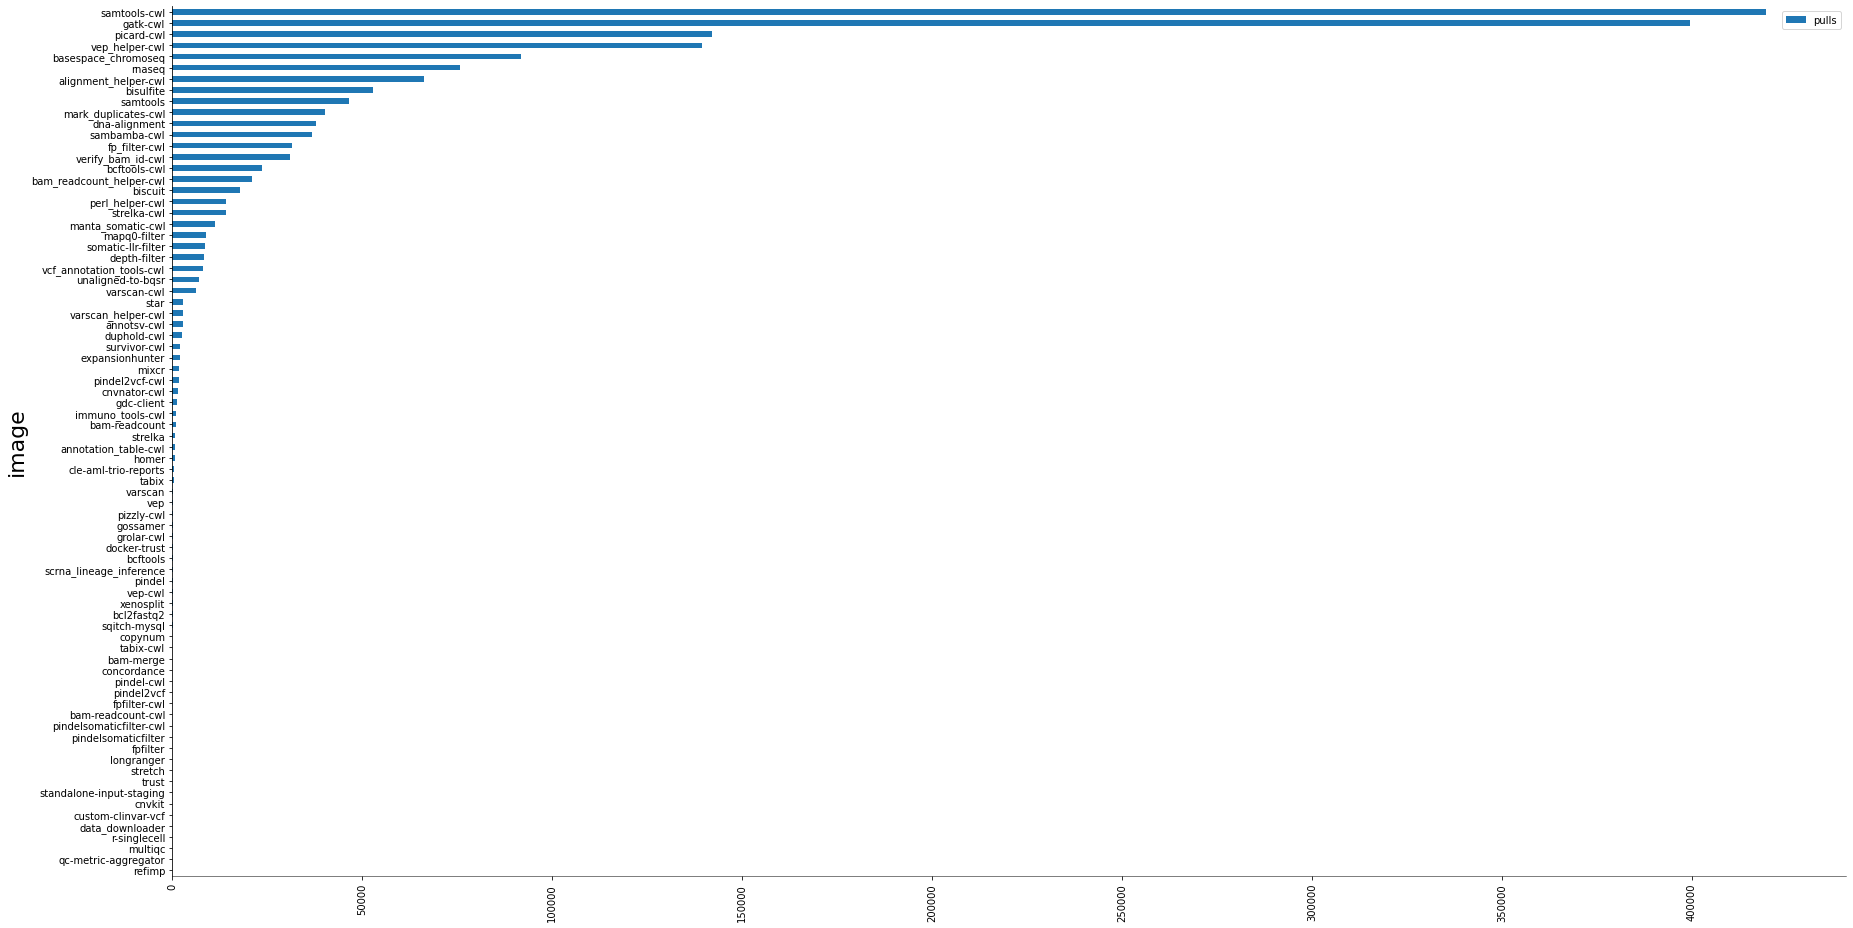

In [45]:
%matplotlib inline
df = d[['image', 'pulls']].sort_values(by = 'pulls', ascending = True)
df.set_index("image", inplace = True)
# cle docker image has the highest number of pulls 
df.drop(df['pulls'].idxmax(), inplace=True)
barh = df.plot(kind='barh',figsize=(30, 16)
)
barh
plt.xticks(rotation = 90)
plt.ylabel("image", fontsize = 22)
barh.spines['top'].set_visible(False)
barh.spines['right'].set_visible(False)
barh.spines['bottom'].set_linewidth(0.5)
barh.spines['left'].set_visible(True)
plt.show()
